<a href="https://colab.research.google.com/github/PavelYakimov/dpo-cv/blob/main/28-09-2021/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install opencv-python

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('testImage.jpg')

pixel = image[500,500]
print('Image size: ', image.shape)
print('Pixel [x=500,y=500] BGR value', pixel)
print(image.dtype)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image2 = image.copy()
#print(image2[500, 500])
#image2[500, 500] = [0,0,0]
#print(image2[500, 500])



In [ ]:
import numpy as np

circle = image[130:310, 430:620]
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(circle, cv2.COLOR_BGR2RGB))
plt.show()

blackImage = np.zeros(circle.shape, circle.dtype)
blackImage[np.where((blackImage == [0,0,0]).all(axis = 2))] = [200,0,0]

#plt.figure(figsize=(5,5))
#plt.imshow(blackImage)
#plt.show()

addImage = cv2.addWeighted(circle, 0.5, blackImage, 0.5, 0)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(addImage, cv2.COLOR_BGR2RGB))
plt.show()

# plt.figure(figsize=(15,15))
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.show()


In [ ]:
image2[100:280, 620:810] = circle

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Split channels
b, g, r = cv2.split(image2)

plt.figure(figsize=(10,10))
plt.imshow(b, cmap='gray')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(g, cmap='gray')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(r, cmap='gray')
plt.show()

In [ ]:
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

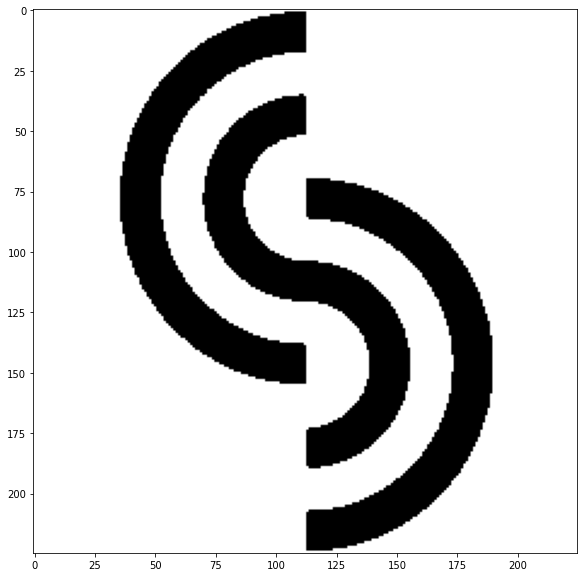

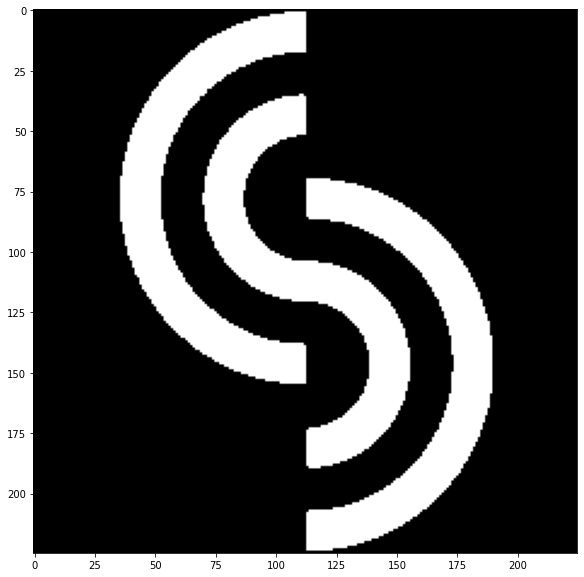

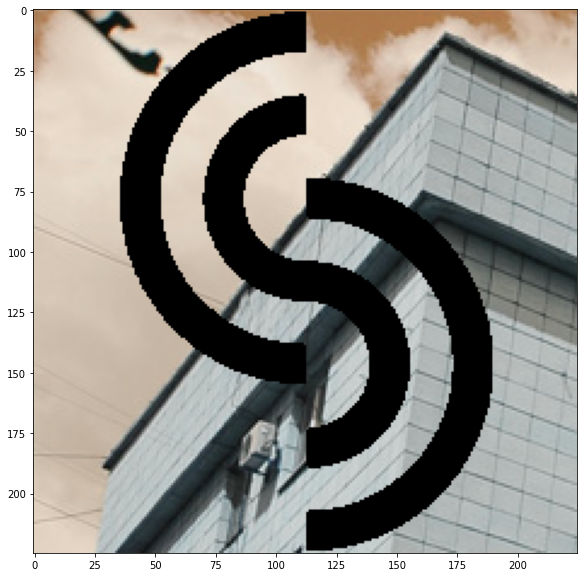

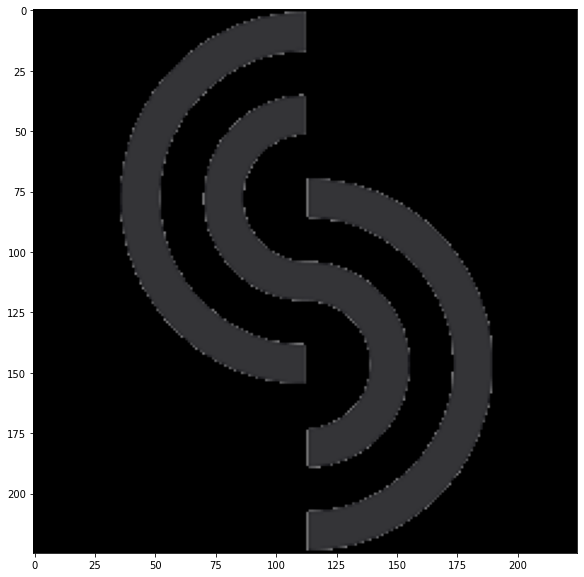

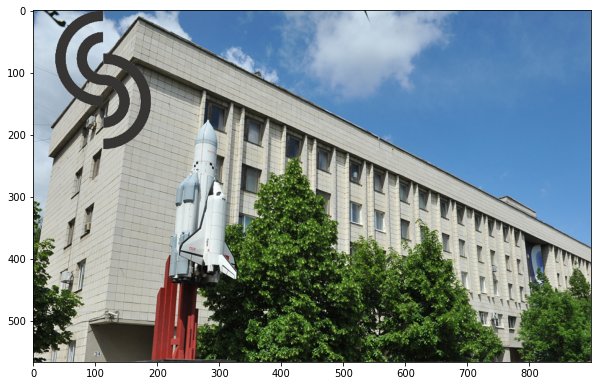

In [88]:
image3a = cv2.imread('SSAU.jpg')
imageLogo = cv2.imread('SSAU_logo.png')

# plt.figure(figsize=(10,10))
# plt.imshow(image3a)
# plt.show()

# plt.figure(figsize=(10,10))
# plt.imshow(imageLogo)
# plt.show()

rows, cols, channels = imageLogo.shape
roi = image3a[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(imageLogo,cv2.COLOR_BGR2GRAY)
# plt.figure(figsize=(10,10))
# plt.imshow(img2gray, cmap='gray')
# plt.show()

ret, mask = cv2.threshold(img2gray, 128, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(mask_inv, cmap='gray')
plt.show()

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask = mask)
plt.figure(figsize=(10,10))
plt.imshow(img1_bg)
plt.show()

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(imageLogo, imageLogo, mask = mask_inv)
plt.figure(figsize=(10,10))
plt.imshow(img2_fg)
plt.show()

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
image3a[0:rows, 0:cols ] = dst
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image3a, cv2.COLOR_BGR2RGB))
plt.show()